### Imported Libraries

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in cast")
warnings.filterwarnings("ignore", category=UserWarning, module="scipy.optimize.linesearch")
warnings.filterwarnings('ignore')


In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Feature Engineering Techniques
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# Import the matplotlib and seaborn libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
import seaborn as sns
sns.set()
import plotly
import plotly.express as px



In [3]:
dataset = pd.read_csv('preprocessed_data.csv')
df = dataset.copy()
df.head(10)

,category_code,status,founded_at,country_code,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,ROI,active_days,isClosed
0,mobile,operating,2003,AUS,NaN,NaN,1.0,1.0,2003.0,2003.0,1.0,250000.0,2007.0,2007.0,1.0,2.000000,6.500497,6570.0,1
1,other,operating,2010,USA,NaN,NaN,1.0,1.0,2011.0,2011.0,1.0,100000.0,2010.0,2010.0,1.0,2.852067,6.500497,4015.0,1
2,enterprise,operating,2004,USA,NaN,NaN,1.0,1.0,2011.0,2011.0,1.0,1500000.0,2010.0,2010.0,1.0,8.000000,6.500497,6205.0,1
3,games_video,operating,2011,USA,NaN,NaN,1.0,1.0,2011.0,2011.0,1.0,40000.0,2012.0,2012.0,1.0,5.000000,6.500497,3650.0,1
4,web,operating,2007,USA,NaN,NaN,1.0,1.0,2007.0,2007.0,1.0,350000.0,2008.0,2008.0,1.0,2.000000,6.500497,5110.0,1
5,other,operating,2009,GBR,NaN,NaN,1.0,1.0,2011.0,2011.0,1.0,559522.0,NaN,NaN,1.0,2.852067,6.500497,4380.0,1
6,web,closed,2007,USA,NaN,NaN,1.0,1.0,2007.0,2007.0,1.0,100000.0,2009.0,2009.0,1.0,1.000000,6.500497,1825.0,0
7,software,operating,2000,USA,NaN,NaN,1.0,1.0,2012.0,2012.0,1.0,45000.0,NaN,NaN,1.0,2.852067,6.500497,7665.0,1
8,web,closed,2006,other,NaN,NaN,1.0,1.0,2012.0,2012.0,1.0,1613875.0,NaN,NaN,1.0,3.000000,6.500497,2555.0,0
9,other,operating,2009,other,NaN,NaN,1.0,1.0,2011.0,2011.0,1.0,720000.0,2010.0,2010.0,1.0,3.000000,6.500497,4380.0,1


### Feature Engineering

In [4]:
df = pd.get_dummies(df, columns = ['category_code','country_code'],drop_first=True)

In [5]:
df.drop(columns = ['invested_companies'],inplace = True)

In [6]:
df.status.value_counts()

operating    7402
closed        635
acquired      398
ipo            16
Name: status, dtype: int64

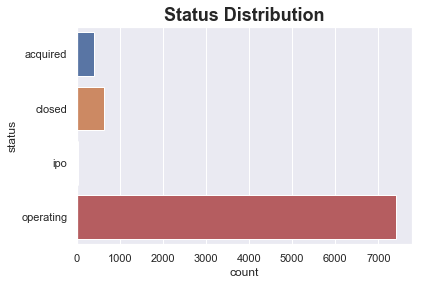

In [7]:
# Check the distribution of the Regions
sns.countplot(y='status', data=df.sort_values(by='status'))
plt.title("Status Distribution", fontweight='bold', fontsize = 18)
plt.show()

Our target column is imbalanced and need to work on the imbalance column

In [8]:
df.head()

,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,ROI,active_days,isClosed,category_code_biotech,category_code_ecommerce,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_health,category_code_mobile,category_code_other,category_code_software,category_code_web,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_USA,country_code_other
0,operating,2003,NaN,NaN,1.0,2003.0,2003.0,1.0,250000.0,2007.0,2007.0,1.0,2.000000,6.500497,6570.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,operating,2010,NaN,NaN,1.0,2011.0,2011.0,1.0,100000.0,2010.0,2010.0,1.0,2.852067,6.500497,4015.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,operating,2004,NaN,NaN,1.0,2011.0,2011.0,1.0,1500000.0,2010.0,2010.0,1.0,8.000000,6.500497,6205.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,operating,2011,NaN,NaN,1.0,2011.0,2011.0,1.0,40000.0,2012.0,2012.0,1.0,5.000000,6.500497,3650.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,operating,2007,NaN,NaN,1.0,2007.0,2007.0,1.0,350000.0,2008.0,2008.0,1.0,2.000000,6.500497,5110.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [9]:
# df['status_class'] = df['status'].map({"operating":0, "ipo":1, "closed":2, "acquired":3})
df['status_class'] = df['status'].map({"operating":1, "ipo":2, "closed":0, "acquired":3})

In [10]:
df['status'] = df['status'].map({"operating":1, "ipo":1, "closed":0, "acquired":0})

In [11]:
df.columns

Index(['status', 'founded_at', 'first_investment_at', 'last_investment_at',
       'investment_rounds', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'ROI',
       'active_days', 'isClosed', 'category_code_biotech',
       'category_code_ecommerce', 'category_code_enterprise',
       'category_code_games_video', 'category_code_hardware',
       'category_code_health', 'category_code_mobile', 'category_code_other',
       'category_code_software', 'category_code_web', 'country_code_CAN',
       'country_code_DEU', 'country_code_ESP', 'country_code_FRA',
       'country_code_GBR', 'country_code_IND', 'country_code_IRL',
       'country_code_ISR', 'country_code_USA', 'country_code_other',
       'status_class'],
      dtype='object')

## Feature 1
Creating new column funding_usd_for_1_round by dividing funding_total_usd with total_funding_rounds, which explains on average how much does one funding round contributes for company

In [12]:
# Average funding for one round
df['funding_usd_for_1_round'] = df['funding_total_usd']/df['funding_rounds']
df['funding_usd_for_1_round']

0         250000.0
1         100000.0
2        1500000.0
3          40000.0
4         350000.0
5         559522.0
6         100000.0
7          45000.0
8        1613875.0
9         720000.0
10       8500000.0
11        250000.0
12        800000.0
13      10200000.0
14        205000.0
15      13800000.0
16        230000.0
17        375000.0
18        450000.0
19        150000.0
20         75000.0
21       3000000.0
22      16000000.0
23        225000.0
24         50000.0
25        150000.0
26       1000000.0
27        895000.0
28       1616176.0
29         50000.0
30        952578.0
31        509412.0
32       7385500.0
33        109018.0
34        900000.0
35      18664050.0
36       8000000.0
37       4000000.0
38         20000.0
39       1200000.0
40        811057.0
41         15000.0
42         57000.0
43        250000.0
44        100000.0
45          2454.0
46        100000.0
47        200000.0
48         35000.0
49        165000.0
50         20000.0
51       6321095.0
52       400

## Feature 2
Taking difference between last milestone and first milestone

In [13]:

df["milestone_diff"] = df['last_milestone_at'] - df['first_milestone_at']

## Feature 3
Taking difference between last funding year and first funding year


In [14]:
df["funding_year_diff"] = df['last_funding_at'] - df['first_funding_at']

In [15]:
# droping unnecessary variables
df.drop(columns = ["first_milestone_at", "last_milestone_at","last_funding_at", "first_funding_at"], inplace = True)

In [16]:
df.active_days.describe(percentiles = [0.10,0.25,0.50,0.75,0.9,0.99])

count    8451.000000
mean     4592.970654
std      1846.906121
min         0.000000
10%      2920.000000
25%      3285.000000
50%      4015.000000
75%      5475.000000
90%      7300.000000
99%      9490.000000
max      9855.000000
Name: active_days, dtype: float64

## Feature 4
bucketing the age groups of company in five buckets

In [17]:

df["Age_bucket"] = np.nan
df.loc[(1000 < df["active_days"]) & ( df["active_days"] <= 2500),"Age_bucket"] = "1000-2500"
df.loc[(2500 < df["active_days"]) & ( df["active_days"] <= 4000),"Age_bucket"] = "2500-4000"
df.loc[(4000 < df["active_days"]) & ( df["active_days"] <= 5500),"Age_bucket"] = "4000-5500"
df.loc[(5500 < df["active_days"]) & ( df["active_days"] <= 7000),"Age_bucket"] = "5500-7000"
df.loc[(7000 < df["active_days"]) & ( df["active_days"] <= 8500),"Age_bucket"] = "7000-10000"

In [18]:
df.head()

,status,founded_at,first_investment_at,last_investment_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,ROI,active_days,isClosed,category_code_biotech,category_code_ecommerce,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_health,category_code_mobile,category_code_other,category_code_software,category_code_web,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_USA,country_code_other,status_class,funding_usd_for_1_round,milestone_diff,funding_year_diff,Age_bucket
0,1,2003,NaN,NaN,1.0,1.0,250000.0,1.0,2.000000,6.500497,6570.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,250000.0,0.0,0.0,5500-7000
1,1,2010,NaN,NaN,1.0,1.0,100000.0,1.0,2.852067,6.500497,4015.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,100000.0,0.0,0.0,4000-5500
2,1,2004,NaN,NaN,1.0,1.0,1500000.0,1.0,8.000000,6.500497,6205.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1500000.0,0.0,0.0,5500-7000
3,1,2011,NaN,NaN,1.0,1.0,40000.0,1.0,5.000000,6.500497,3650.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,40000.0,0.0,0.0,2500-4000
4,1,2007,NaN,NaN,1.0,1.0,350000.0,1.0,2.000000,6.500497,5110.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,350000.0,0.0,0.0,4000-5500


In [19]:
Age_bucket = pd.get_dummies(df['Age_bucket'],prefix="Age_group", drop_first=True)
df= pd.concat([df, Age_bucket], axis = 1)
df.drop(["Age_bucket"],axis = 1, inplace =True)

In [20]:
df.drop(columns =["first_investment_at","last_investment_at", "isClosed"],axis = 1, inplace =True)

In [21]:
# Replace null values with 0 in multiple columns
columns_to_fill = ["milestone_diff", "funding_year_diff"]
df[columns_to_fill] = df[columns_to_fill].fillna(0)

##### MinMax Normalization

In [22]:
# scalling_columns = ["relationships", "active_days", "milestone_diff", "funding_year_diff", "funding_usd_for_1_round"]
# MMS = MinMaxScaler()
# df[scalling_columns] = MMS.fit_transform(df[scalling_columns])

In [23]:
df.head()

,status,founded_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,ROI,active_days,category_code_biotech,category_code_ecommerce,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_health,category_code_mobile,category_code_other,category_code_software,category_code_web,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_USA,country_code_other,status_class,funding_usd_for_1_round,milestone_diff,funding_year_diff,Age_group_2500-4000,Age_group_4000-5500,Age_group_5500-7000,Age_group_7000-10000
0,1,2003,1.0,1.0,250000.0,1.0,2.000000,6.500497,6570.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,250000.0,0.0,0.0,0,0,1,0
1,1,2010,1.0,1.0,100000.0,1.0,2.852067,6.500497,4015.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,100000.0,0.0,0.0,0,1,0,0
2,1,2004,1.0,1.0,1500000.0,1.0,8.000000,6.500497,6205.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1500000.0,0.0,0.0,0,0,1,0
3,1,2011,1.0,1.0,40000.0,1.0,5.000000,6.500497,3650.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,40000.0,0.0,0.0,1,0,0,0
4,1,2007,1.0,1.0,350000.0,1.0,2.000000,6.500497,5110.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,350000.0,0.0,0.0,0,1,0,0


In [24]:
df.isnull().sum()

status                       0
founded_at                   0
investment_rounds            0
funding_rounds               0
funding_total_usd            0
milestones                   0
relationships                0
ROI                          0
active_days                  0
category_code_biotech        0
category_code_ecommerce      0
category_code_enterprise     0
category_code_games_video    0
category_code_hardware       0
category_code_health         0
category_code_mobile         0
category_code_other          0
category_code_software       0
category_code_web            0
country_code_CAN             0
country_code_DEU             0
country_code_ESP             0
country_code_FRA             0
country_code_GBR             0
country_code_IND             0
country_code_IRL             0
country_code_ISR             0
country_code_USA             0
country_code_other           0
status_class                 0
funding_usd_for_1_round      0
milestone_diff               0
funding_

In [25]:
df.shape

(8451, 37)

In [26]:
df.to_csv("FE_data.csv", index = False)